In [97]:
import pandas as pd
from helper_functions import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [98]:
occ_list = import_occupations('occupations_updated.csv')

### Categorical Data Evaluation
1. Count four classifications for each occupation -> confusion matrix
2. calculate measures per occupation
3. calculate measures in total

Confusion matrix 2x2:
|      | he | she |
|------|------|--------|
|he  |      |        |
|she |      |        |

Confusion matrix 3x3:

|      | he | she | they |
|------|------|--------|-------|
|he  |      |        |       |
|she|      |        |       |
|they |      |        |       |

In [99]:
def get_matrix(model, occ_list):
    occupation_matrices = {} #holds all confusion matrices

    for occ in occ_list:
        matrix = pd.DataFrame(np.zeros((3,3)), columns=['he', 'she', 'they'], index=['He', 'She', 'They'])
        occ_name = occ[0]
        df = load_df(model, occ_name)
        grouped = df.groupby(['label', 'prediction1']).size()
        for index in grouped.keys():
            matrix_index = (index[1], index[0])
            matrix.at[matrix_index] = grouped[index]
        occupation_matrices[occ_name] = matrix
    return occupation_matrices

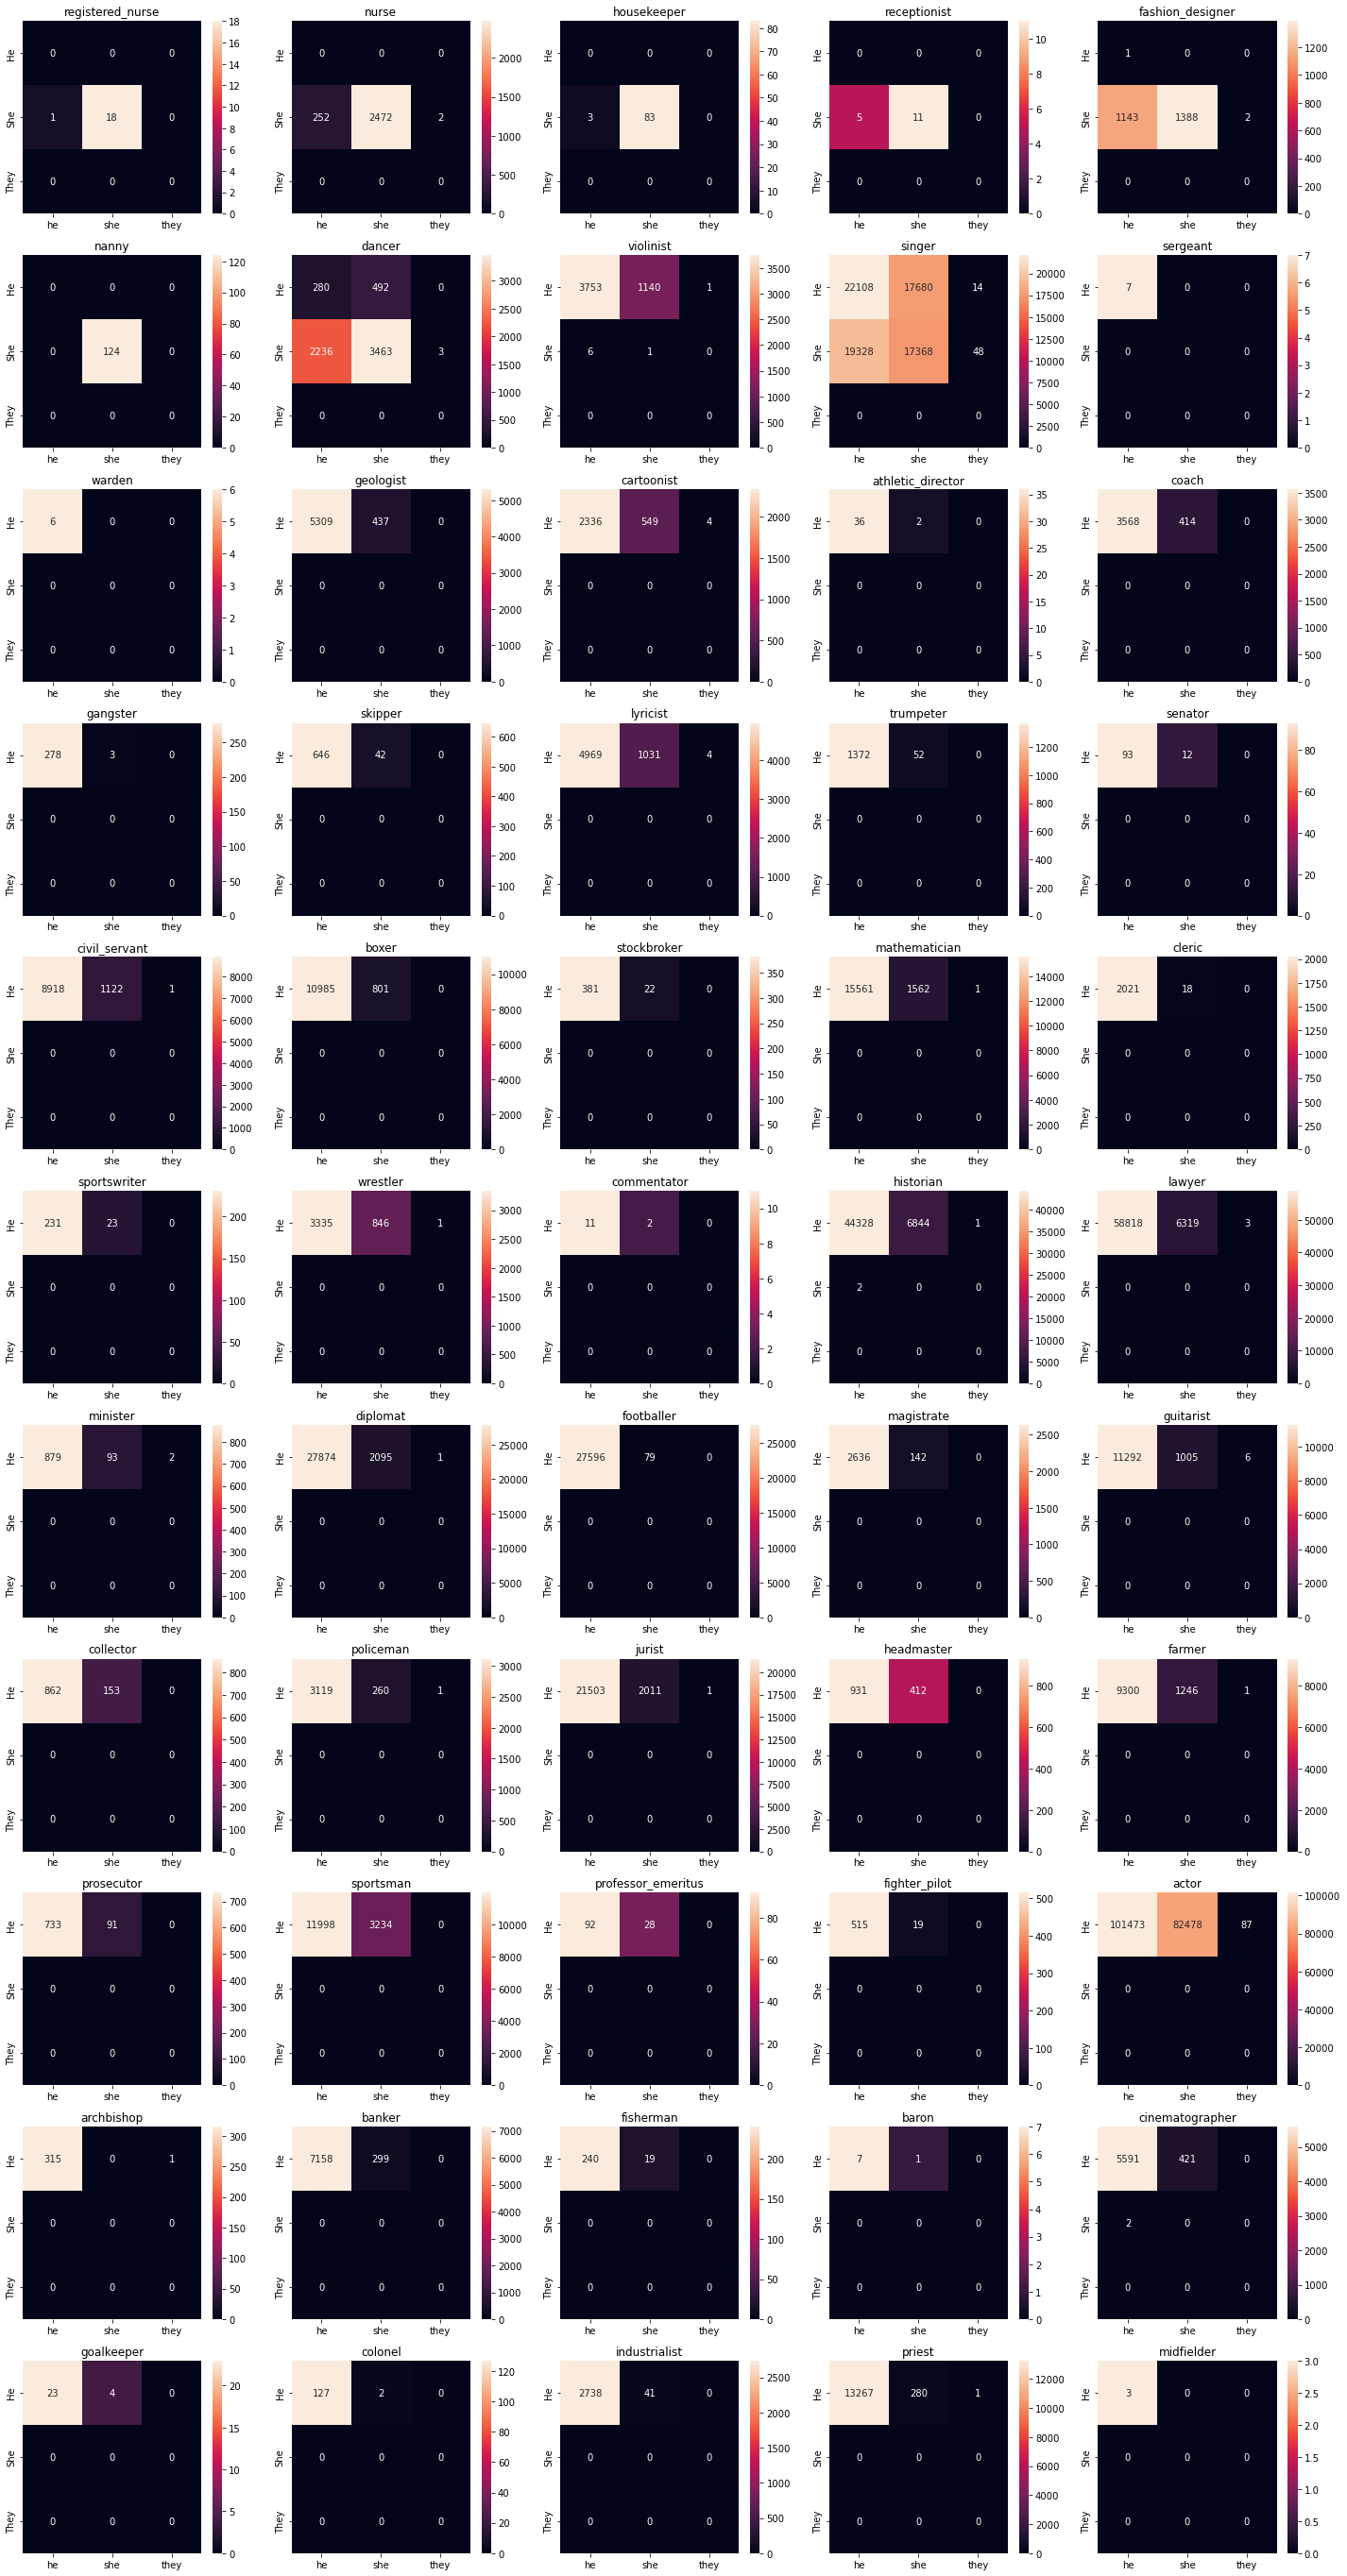

In [100]:
matrices = get_matrix('roberta-base', occ_list)
fig = plt.figure(figsize=(20,38))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, occ in enumerate(occ_list):
    ax = fig.add_subplot(11, 5, i+1)
    ax.title.set_text(occ[0])
    sns.heatmap(matrices[occ[0]].astype('int64'), ax=ax, annot=True, fmt='d')
fig.tight_layout()
plt.show()

KeyError: "['They'] not found in axis"

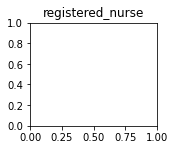

In [101]:
matrices = get_matrix('roberta-base', occ_list)
fig = plt.figure(figsize=(15,28.5))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, occ in enumerate(occ_list):
    ax = fig.add_subplot(11, 5, i+1)
    ax.title.set_text(occ[0])
    matrix = matrices[occ[0]]
    matrix = matrix.drop('They', axis=1)
    matrix = matrix.drop('they', axis=0)
    sns.heatmap(matrix.astype('int64'), ax=ax, annot=True, fmt='d')
fig.tight_layout()
plt.show()